In [2]:
import pandas as pd

NAME_FILE = 'shkifut-plili-utf8-01102021.csv'

data = pd.read_csv(NAME_FILE)
df = pd.DataFrame(data)
df.head(10)

,PoliceDistrict,PoliceMerhav,PoliceStation,Yeshuv,StatArea,Quarter,StatisticGroup,StatisticType,Tikim
0,מחוז דרומי,NaN,NaN,NaN,NaN,NaN,NaN,NaN,327839
1,מחוז דרומי,מרחב אילת דרום,NaN,NaN,NaN,NaN,NaN,NaN,30436
2,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,NaN,NaN,NaN,30436
3,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,NaN,NaN,NaN,2
4,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,NaN,NaN,NaN,2
5,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,2021-Q2,NaN,NaN,1
6,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,NaN,NaN,2021-Q3,NaN,NaN,1
7,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,אילת,NaN,NaN,NaN,NaN,28801
8,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,אילת,NaN,NaN,NaN,NaN,5032
9,מחוז דרומי,מרחב אילת דרום,מרחב אילת דרום,אילת,NaN,2016-Q1,NaN,NaN,411


In [3]:
import matplotlib.pyplot as plt
import numpy as np
CITY1 = 'בת ים'
CITY2 = 'חולון'

tmp_df1 = df.loc[(df['Yeshuv'] == CITY1) & (df['Quarter'].notna()) & (df['StatArea'].isna())]
tmp1 = tmp_df1.groupby(['Yeshuv','Quarter'], as_index=False)[['Tikim']].agg('sum')

tmp_df2 = df.loc[(df['Yeshuv'] == CITY2) & (df['Quarter'].notna()) & (df['StatArea'].isna())]
tmp2 = tmp_df2.groupby(['Yeshuv','Quarter'], as_index=False)[['Tikim']].agg('sum')


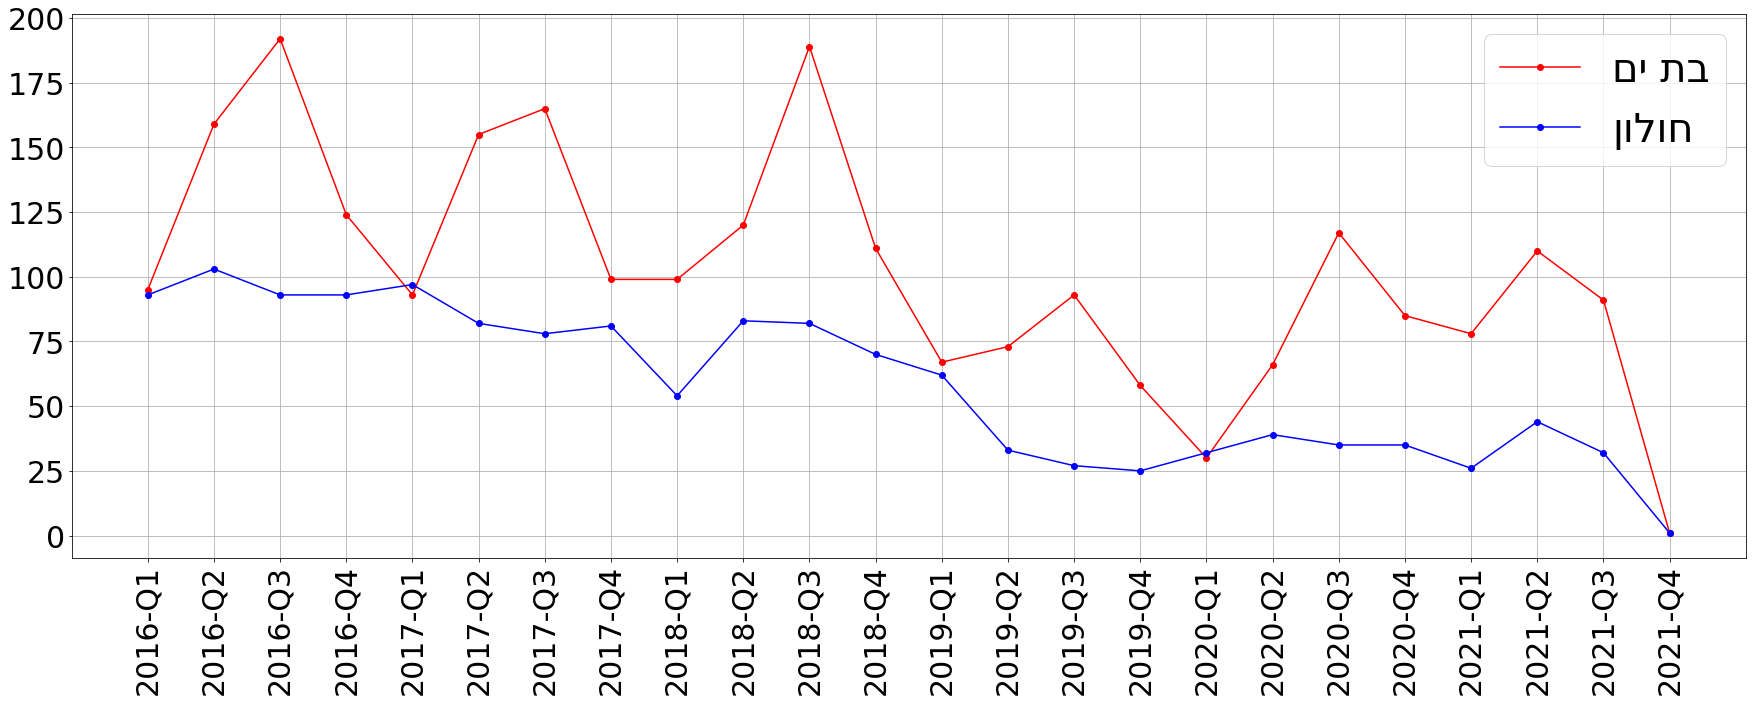

In [4]:
plt.rcParams['figure.figsize'] = [30, 10]
plt.plot(tmp1['Quarter'], tmp1['Tikim'], '-ok', color='r', label=CITY1[::-1])
plt.plot(tmp2['Quarter'], tmp2['Tikim'], '-ok', color='b', label=CITY2[::-1])
plt.legend(prop={'size':40})
plt.tick_params(axis='x', labelsize=30, rotation=90)
plt.tick_params(axis='y', labelsize=30)
plt.grid()

In [30]:
tmp_df3 = df.loc[((df['StatisticGroup'].notna()) & (df['StatisticType'].notna()) & (df['Quarter'].notna())), ['StatisticGroup','StatisticType', 'Quarter', 'Tikim']]
tmp_df3

,StatisticGroup,StatisticType,Quarter,Tikim
34,סעיפי הגדרה,סעיפי הגדרה,2016-Q1,1
35,עבירות כלפי המוסר,"סחר,יבוא ויצוא סמים",2016-Q1,1
36,עבירות כלפי המוסר,שמוש בסמים מסוכנים,2016-Q1,35
37,עבירות כלפי הרכוש,גניבה מתוך רכב,2016-Q1,3
38,עבירות כלפי הרכוש,"גניבה ע""י עובדים וסוכנים",2016-Q1,1
...,...,...,...,...
684897,עבירות סדר ציבורי,עבירות נגד הסדר הצבורי,2021-Q3,16
684898,עבירות סדר ציבורי,עבירות על חוק הכניסה לישראל,2021-Q3,21
684899,עבירות סדר ציבורי,פגיעה בפרטיות,2021-Q3,2
684900,עבירות סדר ציבורי,תקיפת והכשלת שוטר,2021-Q3,7


In [31]:
tmp3 = tmp_df3.groupby(['StatisticGroup', 'Quarter'], as_index = False)[['Tikim']].agg('sum')
tmp3

,StatisticGroup,Quarter,Tikim
0,לא ידוע,2016-Q4,1
1,לא ידוע,2017-Q1,1
2,סעיפי הגדרה,2016-Q1,91
3,סעיפי הגדרה,2016-Q2,82
4,סעיפי הגדרה,2016-Q3,85
...,...,...,...
343,שאר עבירות,2020-Q3,22
344,שאר עבירות,2020-Q4,31
345,שאר עבירות,2021-Q1,17
346,שאר עבירות,2021-Q2,16


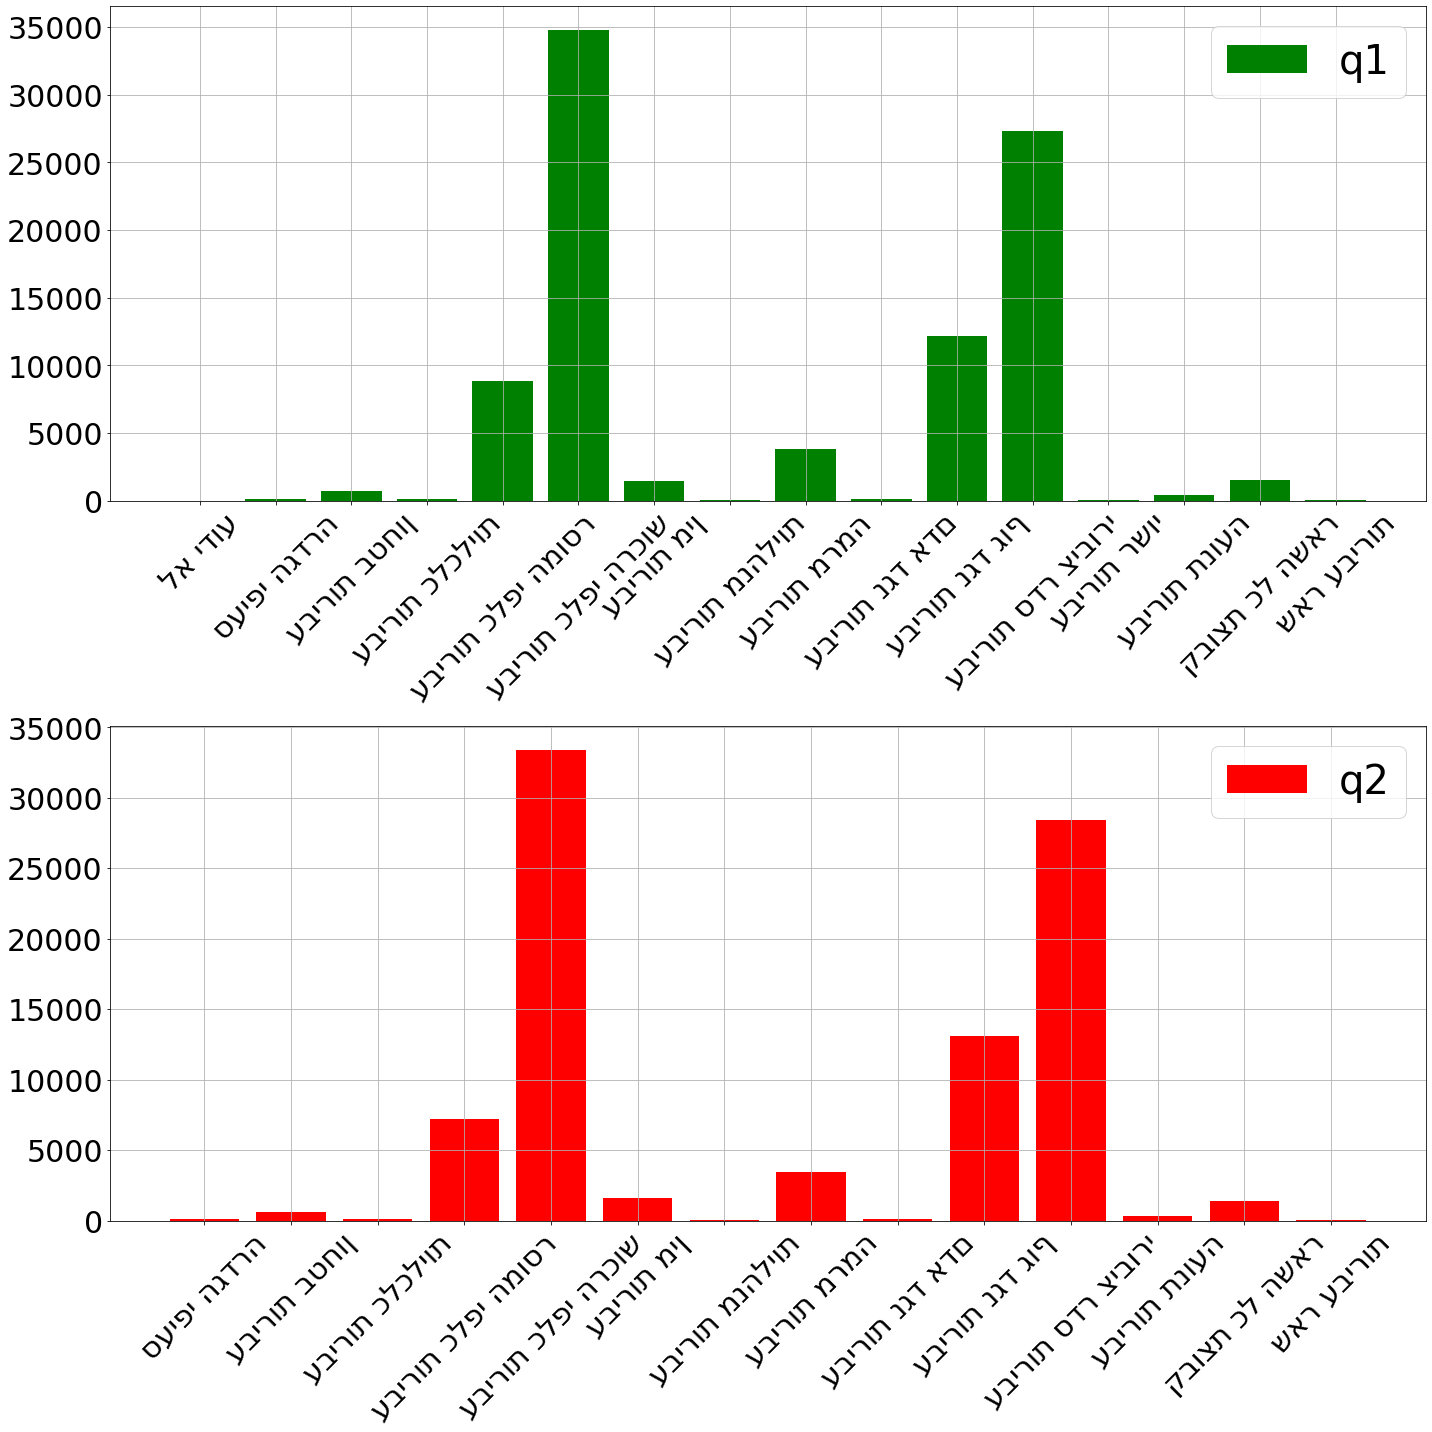

In [72]:
q1 = tmp3.loc[tmp3['Quarter'] == '2017-Q1', 'Tikim']
q2 = tmp3.loc[tmp3['Quarter'] == '2017-Q2', 'Tikim']
lab1 = tmp3.loc[(tmp3['Quarter'] == '2017-Q1'), 'StatisticGroup']
lab2 = tmp3.loc[(tmp3['Quarter'] == '2017-Q2'), 'StatisticGroup']

fig, ax = plt.subplots(2, figsize=(20,20))

p1 = ax[0].bar(lab1, q1, label='q1', color='g')
p2 = ax[1].bar(lab2, q2, label='q2', color='r')

for i in range(2):
    ax[i].tick_params(axis='x', labelsize=30, rotation=45)
    ax[i].tick_params(axis='y', labelsize=30)
    ax[i].legend(prop={'size':40})
    ax[i].grid()

fig.tight_layout()
